# CRLD




**Collective Reinforcement Learning Dynamics** in Python

is a tool to model the collective dynamics emerging from multi-agent reinforcement learning.

---

Multi-agent reinforcement learning (MARL) provides a comprehensive framework for studying the interplay among learning, representation, and decision-making between multiple actors.
As a result, it offers an integrating platform to in-silico test hypotheses and build theory on how different cognitive mechanisms affect collective adaptive behavior in complex environments.

![](_figures/MAEi_core.png)

In combination with advances in machine learning, particularly deep learning, modern MARL has produced spectacular successes in high-dimensional environments. 
However, standard RL simulations have significant disadvantages for modeling the collective behavior emerging from MARL: they are *noisy*, sometimes *hard to explain*, *sample-inefficient*, and *computationally intense*.

**CRLD** offers a solution in two ways of idealization.
First, CRLD aims to understand the principles behind collective behavior in idealized, low-dimensional environments. Second, CRLD concentrates on the essence of the stochastic and computationally intense reinforcement learning algorithms by deriving their strategy-average, deterministic learning equations. 

In a nutshell, reinforcement learning agents strive to *improve* the rewards they receive while inter*act*ing with the environment. In each time step, they asses a sample of their current *reward-prediction error* $\delta$. 

The key idea of CRLD is to replace the individual sample realizations with its strategy average plus a small error term,

$$
\delta \leftarrow \bar\delta + \epsilon.
$$

One can interpret these learning dynamics from a cognitive and an engineering perspective. In the limit of a vanishing error term, $\epsilon \rightarrow 0$, agents have a perfect model of the current environment (cognitive interpretation) or an infinite replay buffer (engineering interpretation)

How to put these ideas into practice?

## Install

First, let's install the package from github:

```sh
pip install "git+https://github.com/wbarfuss/pyCRLD.git"
```

## How to use

Second, we create a minimal example of a phase space portrait of the learning dynamics in a classic social dilemma environment:

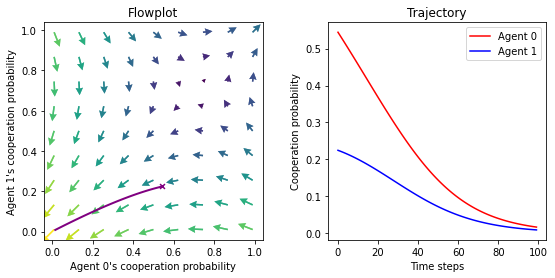

In [ ]:
from pyCRLD.Agents.StrategyActorCritic import stratAC
from pyCRLD.Environments.SocialDilemma import SocialDilemma
from pyCRLD.Utils import FlowPlot as fp

import numpy as np
import matplotlib.pyplot as plt

# Init enviornment and MultiAgentEnvironment-interface
env = SocialDilemma(R=1.0, T=0.8, S=-0.5, P=0.0)
mae = stratAC(env=env, learning_rates=0.1, discount_factors=0.9)

# Compute learning trajectory 
x = mae.random_softmax_strategy()  # from a random inital policy
xtraj, fixedpointreached = mae.trajectory(x)

# PLOT
fig, axs = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(wspace=0.3)

# Plot in phase space
x = ([0], [0], [0])
y = ([1], [0], [0])
ax = fp.plot_strategy_flow(mae, x, y, flowarrow_points = np.linspace(0.01 ,0.99, 9), axes=[axs[0]])
fp.plot_trajectories([xtraj], x, y, cols=['purple'], axes=ax);
ax[0].set_xlabel("Agent 0's cooperation probability")
ax[0].set_ylabel("Agent 1's cooperation probability");
ax[0].set_title("Flowplot")

# Plot in trajectory
axs[1].plot(xtraj[:, 0, 0, 0], label="Agent 0", c='red')
axs[1].plot(xtraj[:, 1, 0, 0], label="Agent 1", c='blue')
axs[1].set_xlabel('Time steps')
axs[1].set_ylabel('Cooperation probability')
axs[1].legend()
axs[1].set_title("Trajectory");

We see how the learning trajectories on the right result from the flow on the left, which suggests that in this environment, mutual cooperation and mutual defection are viable solutions, depending on the initial cooperation levels of both agents.